In [1]:
from fastai.vision.all import *

In [5]:
path = Path('../paddy_doctor')
Path.BASE_PATH = path
(path/'data').ls()

(#5) [Path('data/train_images'),Path('data/train.csv'),Path('data/paddy-disease-classification.zip'),Path('data/test_images'),Path('data/sample_submission.csv')]

In [6]:
train_df = pd.read_csv(path/'data/train.csv')
train_df.shape

(10407, 4)

First let's take a look at our data

In [7]:
train_df.head(1)

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45


In [49]:
#np array displays better than vertical python list
np.asarray([x.name for x in (path/'data/train_images').ls()])

array(['bacterial_panicle_blight', 'downy_mildew', 'hispa', 'dead_heart',
       'tungro', 'blast', 'brown_spot', 'normal', 'bacterial_leaf_streak',
       'bacterial_leaf_blight'], dtype='<U24')

The images are stored by label in their own respective folders. Let's modify our dataframe to handle each path respectively

In [40]:
train_df['path'] = str(path) + '/data/train_images/' \
            + train_df['label'] + '/' \
            + train_df['image_id']

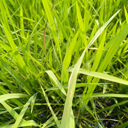

In [44]:
Image.open(train_df.path[0]).resize((128,128))

Ok we have a dataframe that we can index into and get our applicable image! The label is in the folder name or the dataframe. So we have everything we need to create our dataloaders!

In [63]:
#ImageDataLoaders.from_df??

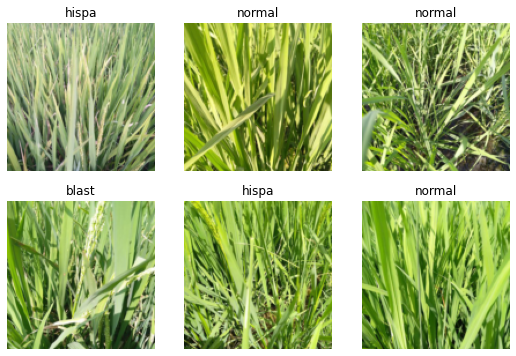

In [75]:
dls = ImageDataLoaders.from_df(df=train_df, 
                               fn_col=-1, 
                               label_col=1,
                               bs=512,
                               item_tfms=Resize(128))
dls.show_batch(max_n=6)

In [58]:
#ImageDataLoaders.from_df??

This was randomly split by default. But since we have what we need to train a model, let's do that to start and confirm things are behaving as expected -- we'll circle back around and figure out how to improve things after we have somehting functioning

In [76]:
learner = cnn_learner(dls, resnet18, metrics=accuracy)
learner.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,3.077389,1.712195,0.474291,00:13


epoch,train_loss,valid_loss,accuracy,time
0,1.921988,1.104883,0.648727,00:13
1,1.496822,0.809252,0.740029,00:13
2,1.217798,0.736076,0.761653,00:13


Huge batch sizes probably are not ideal with such a small model